In [25]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [26]:
# Load the data
data = pd.read_csv('new_synthetic_data_credit_assigned.csv')

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Define the ColumnTransformer
# The 'sparse' argument was removed in scikit-learn version 1.2.
# If you are using a newer version, remove 'sparse=False' from OneHotEncoder.
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(drop='first', handle_unknown='ignore'), # Remove sparse=False and add handle_unknown='ignore' to avoid errors with unseen values in the test set
     ['GENDER', 'MARITAL STATUS', 'ARE YOU THE PRIMARY EARNER OF YOUR FAMILY ?',
      'SKILL 1', 'SKILL 2', 'SKILL 3',
      'DO YOU HAVE ANY CERTIFICATION OF THE ABOVE-MENTIONED SKILL SET?',
      'OWNERSHIP ( includes Land,machine)',
      'Relation with primary earner ?']),
    ('tnf2', OrdinalEncoder(categories=[['Class III','Class IV', 'Class V','Class v', 'ClassV', 'Class VI', 'Class VII', 'Class VIII', 'Class IX','HS', 'HSLC', 'BA Ongoing', 'BCom','B Com', 'BA ','BA', 'BSc', 'MSc', 'MCA', 'PhD']]),
     ['WHAT IS YOUR HIGHEST EDUCATIONAL QUALIFICATION?']),

], remainder='passthrough')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_transformed = transformer.fit_transform(X_train)

# Transform the test data
X_test_transformed = transformer.transform(X_test)

In [27]:
rf = RandomForestClassifier(criterion='entropy',max_depth=17,max_features=15,min_samples_leaf=6,n_estimators=50)
rf.fit(X_train_transformed,y_train)
y_pred_train = rf.predict(X_train_transformed)
accuracy_score(y_train, y_pred_train)                             #accuracy on train set

0.975

In [28]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rf, X_train_transformed, y_train, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')                          #k-fold cross validation accuracy

Cross-Validation Results (Accuracy): [0.94375 0.925   0.9625  0.93125 0.99375]
Mean Accuracy: 0.9512499999999999


In [29]:
y_pred_test = rf.predict(X_test_transformed)
accuracy_score(y_test, y_pred_test)                              #accuracy on test set

0.945

In [30]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.945
Precision: 0.948
Recall: 0.939
F1 Score: 0.944


In [31]:
# Robustness Analysis
print("\n--- Robustness Analysis ---")



--- Robustness Analysis ---


feature imp graph

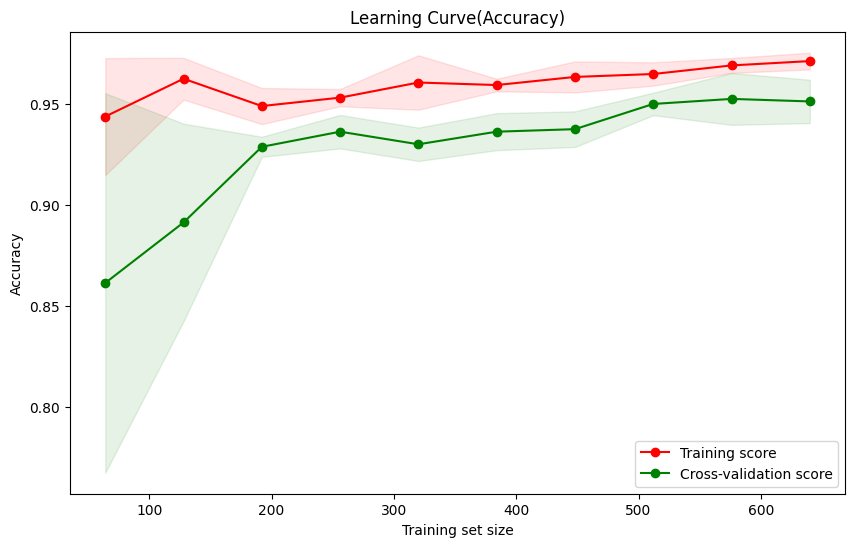

In [32]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=rf,
    X=X_train_transformed,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve(Accuracy)")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color='g', label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.show()

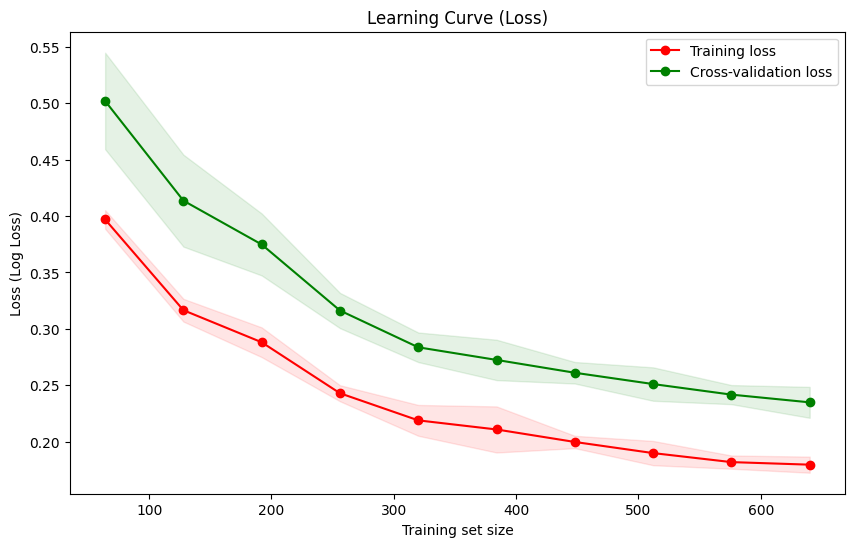

In [33]:
# Assuming rf is the estimator (e.g., RandomForestClassifier)
# and X_train, y_train are the training data and labels

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=rf,
    X=X_train_transformed,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',  # Use negative log loss
    n_jobs=-1
)

# Convert scores to positive values (since they are negative)
train_scores = -train_scores
valid_scores = -valid_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Loss)")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label="Training loss")
plt.plot(train_sizes, valid_mean, 'o-', color='g', label="Cross-validation loss")
plt.legend(loc="best")
plt.xlabel("Training set size")
plt.ylabel("Loss (Log Loss)")
plt.show()


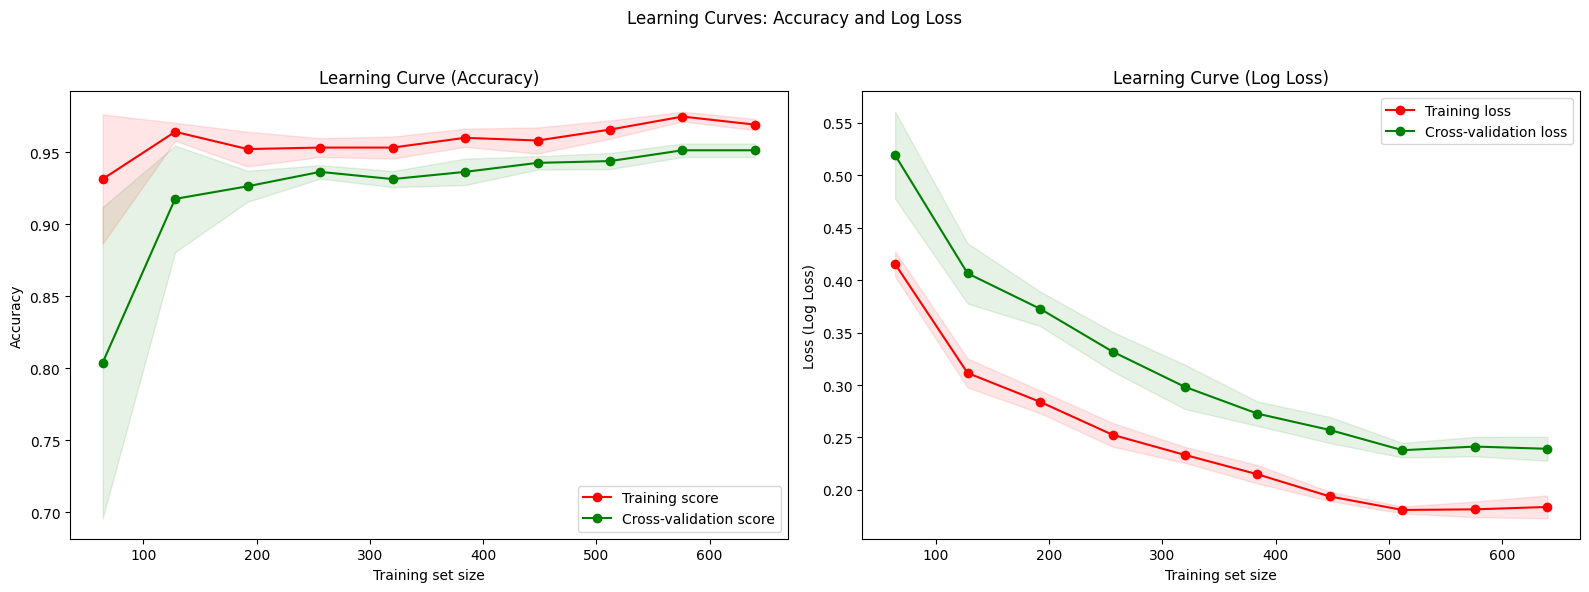

In [34]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculate learning curves for accuracy
train_sizes, train_scores_acc, valid_scores_acc = learning_curve(
    estimator=rf,
    X=X_train_transformed,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate learning curves for log loss
_, train_scores_loss, valid_scores_loss = learning_curve(
    estimator=rf,
    X=X_train_transformed,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',  # Use negative log loss
    n_jobs=-1
)

# Convert negative log loss to positive values
train_scores_loss = -train_scores_loss
valid_scores_loss = -valid_scores_loss

# Calculate means and standard deviations
train_mean_acc = np.mean(train_scores_acc, axis=1)
train_std_acc = np.std(train_scores_acc, axis=1)
valid_mean_acc = np.mean(valid_scores_acc, axis=1)
valid_std_acc = np.std(valid_scores_acc, axis=1)

train_mean_loss = np.mean(train_scores_loss, axis=1)
train_std_loss = np.std(train_scores_loss, axis=1)
valid_mean_loss = np.mean(valid_scores_loss, axis=1)
valid_std_loss = np.std(valid_scores_loss, axis=1)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.set_title("Learning Curve (Accuracy)")
ax1.fill_between(train_sizes, train_mean_acc - train_std_acc, train_mean_acc + train_std_acc, alpha=0.1, color='r')
ax1.fill_between(train_sizes, valid_mean_acc - valid_std_acc, valid_mean_acc + valid_std_acc, alpha=0.1, color='g')
ax1.plot(train_sizes, train_mean_acc, 'o-', color='r', label="Training score")
ax1.plot(train_sizes, valid_mean_acc, 'o-', color='g', label="Cross-validation score")
ax1.set_xlabel("Training set size")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="best")

# Loss plot
ax2.set_title("Learning Curve (Log Loss)")
ax2.fill_between(train_sizes, train_mean_loss - train_std_loss, train_mean_loss + train_std_loss, alpha=0.1, color='r')
ax2.fill_between(train_sizes, valid_mean_loss - valid_std_loss, valid_mean_loss + valid_std_loss, alpha=0.1, color='g')
ax2.plot(train_sizes, train_mean_loss, 'o-', color='r', label="Training loss")
ax2.plot(train_sizes, valid_mean_loss, 'o-', color='g', label="Cross-validation loss")
ax2.set_xlabel("Training set size")
ax2.set_ylabel("Loss (Log Loss)")
ax2.legend(loc="best")

plt.suptitle("Learning Curves: Accuracy and Log Loss")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


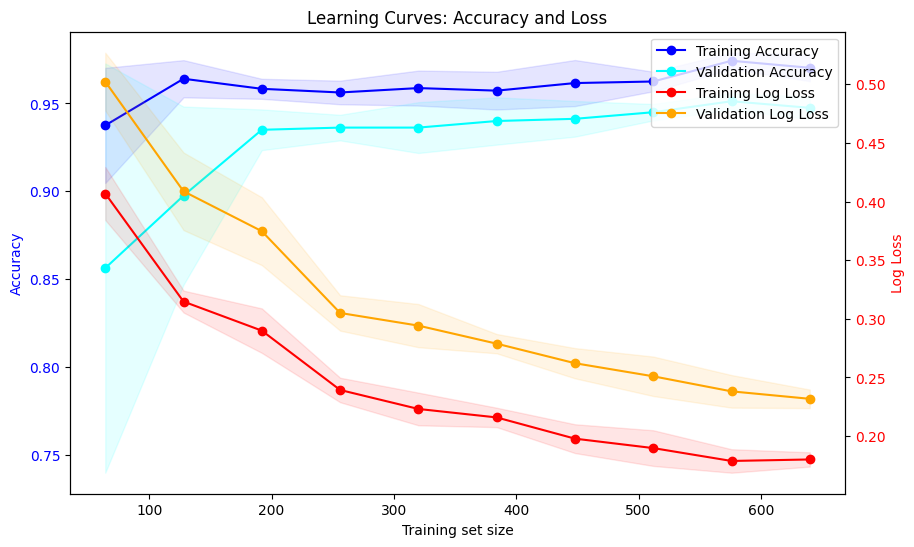

In [35]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculate learning curves for accuracy
train_sizes, train_scores_acc, valid_scores_acc = learning_curve(
    estimator=rf,
    X=X_train_transformed,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate learning curves for log loss
_, train_scores_loss, valid_scores_loss = learning_curve(
    estimator=rf,
    X=X_train_transformed,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',  # Use negative log loss
    n_jobs=-1
)

# Convert negative log loss to positive values
train_scores_loss = -train_scores_loss
valid_scores_loss = -valid_scores_loss

# Calculate means and standard deviations
train_mean_acc = np.mean(train_scores_acc, axis=1)
train_std_acc = np.std(train_scores_acc, axis=1)
valid_mean_acc = np.mean(valid_scores_acc, axis=1)
valid_std_acc = np.std(valid_scores_acc, axis=1)

train_mean_loss = np.mean(train_scores_loss, axis=1)
train_std_loss = np.std(train_scores_loss, axis=1)
valid_mean_loss = np.mean(valid_scores_loss, axis=1)
valid_std_loss = np.std(valid_scores_loss, axis=1)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy with the left y-axis
ax1.set_xlabel("Training set size")
ax1.set_ylabel("Accuracy", color="blue")
ax1.fill_between(train_sizes, train_mean_acc - train_std_acc, train_mean_acc + train_std_acc, alpha=0.1, color="blue")
ax1.fill_between(train_sizes, valid_mean_acc - valid_std_acc, valid_mean_acc + valid_std_acc, alpha=0.1, color="cyan")
ax1.plot(train_sizes, train_mean_acc, 'o-', color="blue", label="Training Accuracy")
ax1.plot(train_sizes, valid_mean_acc, 'o-', color="cyan", label="Validation Accuracy")
ax1.tick_params(axis="y", labelcolor="blue")

# Instantiate a second y-axis to plot log loss
ax2 = ax1.twinx()
ax2.set_ylabel("Log Loss", color="red")
ax2.fill_between(train_sizes, train_mean_loss - train_std_loss, train_mean_loss + train_std_loss, alpha=0.1, color="red")
ax2.fill_between(train_sizes, valid_mean_loss - valid_std_loss, valid_mean_loss + valid_std_loss, alpha=0.1, color="orange")
ax2.plot(train_sizes, train_mean_loss, 'o-', color="red", label="Training Log Loss")
ax2.plot(train_sizes, valid_mean_loss, 'o-', color="orange", label="Validation Log Loss")
ax2.tick_params(axis="y", labelcolor="red")

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right", frameon=True)

plt.title("Learning Curves: Accuracy and Loss")
plt.show()


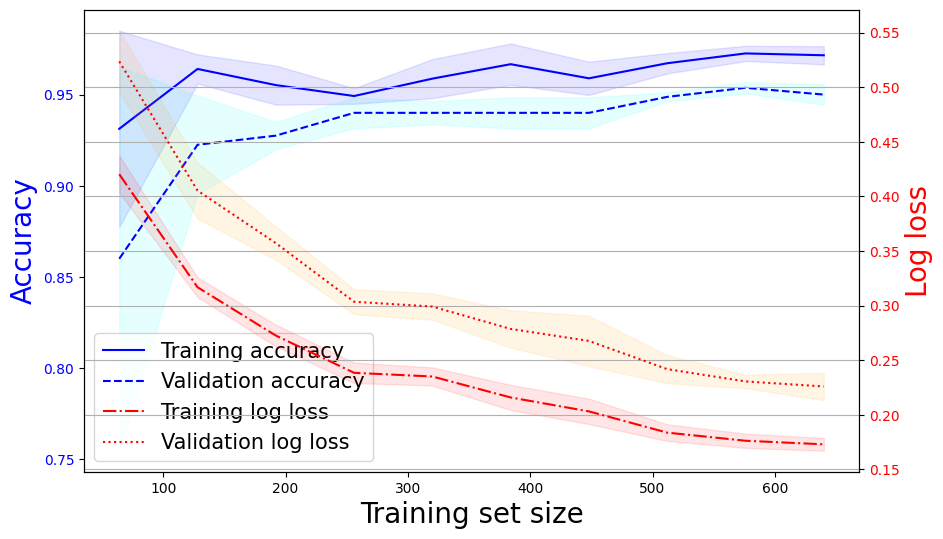

In [36]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculate learning curves for accuracy
train_sizes, train_scores_acc, valid_scores_acc = learning_curve(
    estimator=rf,
    X=X_train_transformed,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate learning curves for log loss
_, train_scores_loss, valid_scores_loss = learning_curve(
    estimator=rf,
    X=X_train_transformed,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',  # Use negative log loss
    n_jobs=-1
)

# Convert negative log loss to positive values
train_scores_loss = -train_scores_loss
valid_scores_loss = -valid_scores_loss

# Calculate means and standard deviations
train_mean_acc = np.mean(train_scores_acc, axis=1)
train_std_acc = np.std(train_scores_acc, axis=1)
valid_mean_acc = np.mean(valid_scores_acc, axis=1)
valid_std_acc = np.std(valid_scores_acc, axis=1)

train_mean_loss = np.mean(train_scores_loss, axis=1)
train_std_loss = np.std(train_scores_loss, axis=1)
valid_mean_loss = np.mean(valid_scores_loss, axis=1)
valid_std_loss = np.std(valid_scores_loss, axis=1)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy with the left y-axis
ax1.set_xlabel("Training set size",fontsize=20)
ax1.set_ylabel("Accuracy", color="blue",fontsize=20)
ax1.fill_between(train_sizes, train_mean_acc - train_std_acc, train_mean_acc + train_std_acc, alpha=0.1, color="blue")
ax1.fill_between(train_sizes, valid_mean_acc - valid_std_acc, valid_mean_acc + valid_std_acc, alpha=0.1, color="cyan")
ax1.plot(train_sizes, train_mean_acc, linestyle='-', color="blue", label="Training accuracy")  # Solid line for training accuracy
ax1.plot(train_sizes, valid_mean_acc, linestyle='--', color="blue", label="Validation accuracy")  # Dashed line for validation accuracy
ax1.tick_params(axis="y", labelcolor="blue")

# Instantiate a second y-axis to plot log loss
ax2 = ax1.twinx()
ax2.set_ylabel("Log loss", color="red",fontsize=20)
ax2.fill_between(train_sizes, train_mean_loss - train_std_loss, train_mean_loss + train_std_loss, alpha=0.1, color="red")
ax2.fill_between(train_sizes, valid_mean_loss - valid_std_loss, valid_mean_loss + valid_std_loss, alpha=0.1, color="orange")
ax2.plot(train_sizes, train_mean_loss, linestyle='-.', color="red", label="Training log loss")  # Dash-dot line for training log loss
ax2.plot(train_sizes, valid_mean_loss, linestyle=':', color="red", label="Validation log loss")  # Dotted line for validation log loss
ax2.tick_params(axis="y", labelcolor="red")

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="lower left", frameon=True, fontsize=15)

plt.grid(True)
plt.show()


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_proba, pos_label=1, title='ROC Curve', color='darkorange'):
    """
    Plots an ROC curve using true labels and predicted probabilities.
    """
    # Compute the ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


In [38]:
def plot_precision_recall_curve(y_true, y_proba, pos_label=1, title='Precision-Recall Curve', color='blue'):
    """
    Plots a Precision-Recall curve using true labels and predicted probabilities.
    """
    # Compute the precision-recall curve and average precision
    precision, recall, _ = precision_recall_curve(y_true, y_proba, pos_label=pos_label)
    avg_precision = average_precision_score(y_true, y_proba, pos_label=pos_label)

    # Plotting the Precision-Recall curve
    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, color=color, lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()


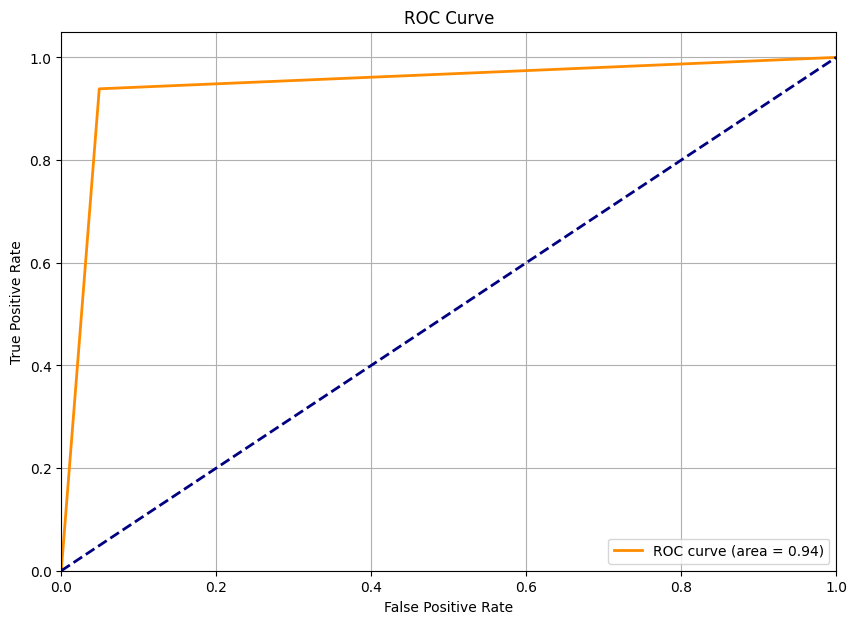

In [39]:
plot_roc_curve(y_test, y_pred_test, pos_label=1)

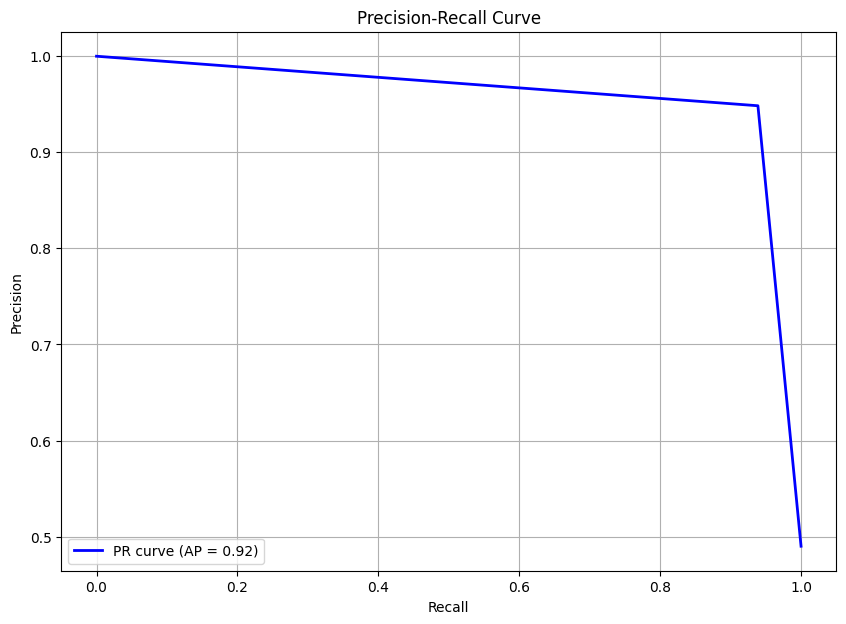

In [40]:
plot_precision_recall_curve(y_test, y_pred_test, pos_label=1)

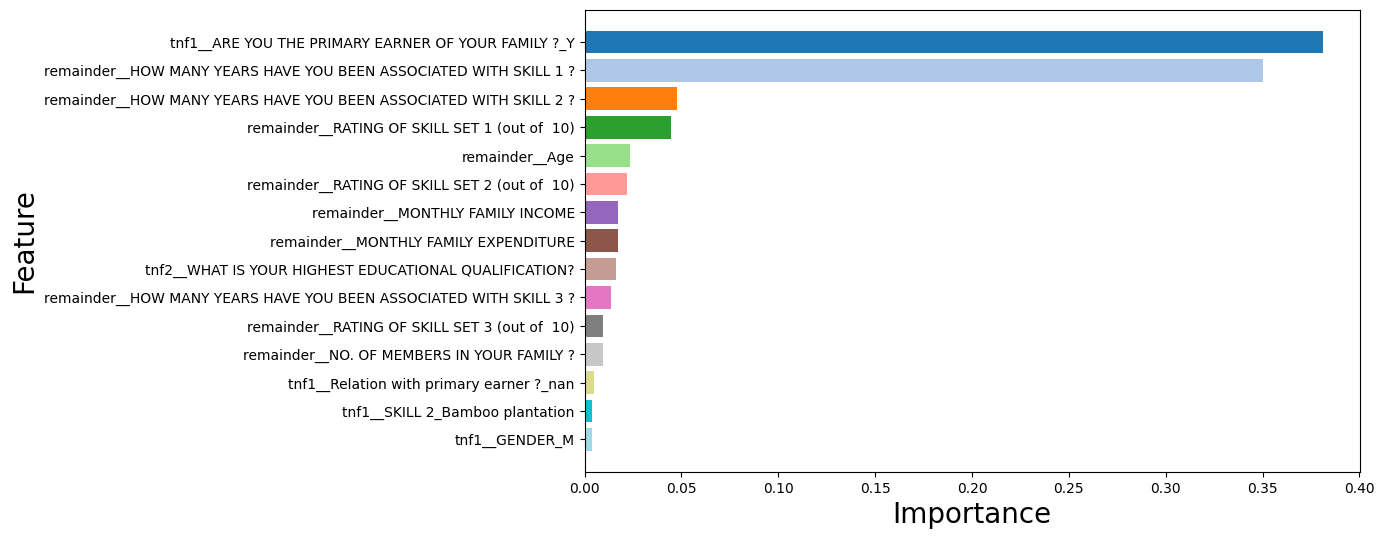

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Ensure pandas is imported

# Get feature importances
importances = rf.feature_importances_

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance'])

# Sort the feature importances
feature_importances = feature_importances.sort_values(by='importance', ascending=False).head(15)

# Generate more distinct colors using a perceptually uniform colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(feature_importances)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'], color=colors)
plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20)

plt.gca().invert_yaxis()
plt.show()
